STARTING SEGMENTATION
Image generated in 6.269750356674194
Image generated in 6.84323787689209
Image generated in 7.544466257095337
Image generated in 8.392196655273438
PROCESS COMPLETED in: 8.392196655273438


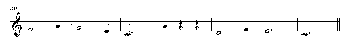

In [2]:
import cv2
import glob
import time
import pickle
import numpy as np
from box import Box
import skimage.io as io
from PIL import Image
from fit import predict
from pre_processing import *
from commonfunctions import *
from wand.image import Image
from segmenter import Segmenter
from wand.display import display
from connected_componentes import  *
from imutils import resize as im_resize
from scipy.ndimage import binary_fill_holes
from skimage.morphology import skeletonize, thin
from skimage.filters import threshold_otsu, gaussian, median, threshold_yen
from staff import calculate_thickness_spacing, remove_staff_lines, coordinator

def Slice(input):
    start_time = time.time()
    input_path=input
    img_name = input_path.split('/')[-1]
    imgs_path = input_path[:-len(img_name)]
    img = io.imread(f'{imgs_path}{img_name}')
    img = cv2.imread(input_path,0)
    img_buffer=None
    imgf=None
    imgmat=None
    with Image.from_array(img) as im:
        img_buffer = np.asarray(bytearray(im.make_blob("JPEG")), dtype=np.uint8)
        ret, mat = binarize_image(img_buffer)
        with Image(blob=mat) as timg:
            imgf = mat
            timg.save(filename="otsu.jpg")
            timg.deskew(0.4*im.quantum_range)
            timg.save(filename="otsu2.jpg")
            imgf = np.array(timg)
            img_buffer = np.asarray(bytearray(timg.make_blob("JPEG")), dtype=np.uint8)
            imgmat = cv2.imdecode(img_buffer, cv2.IMREAD_UNCHANGED)

    print("STARTING SEGMENTATION")
    imgmat = get_thresholded(imgmat, 245)
    segmenter = Segmenter(imgmat)
    imgs_with_staff = segmenter.regions_with_staff
    show_images([imgs_with_staff[0]])
    
    for i, img in enumerate(imgs_with_staff):
        plt.rcParams["figure.figsize"] = (20,15)
        plt.gca().set_axis_off()
        plt.gca().set_title("")
        fig=plt.imshow(imgs_with_staff[i],interpolation='nearest')
        plt.savefig('output\slice'+str(i)+'.png',
        bbox_inches='tight', pad_inches=0, format='png', dpi=600)
        print("Image generated in " + str(time.time() - start_time))

    print("PROCESS COMPLETED in: " + str(time.time() - start_time))
    return len(imgs_with_staff)

if __name__ == '__main__':
    Slice(r"C:\Users\aroue\Downloads\Documents\@ML\Sheet Music\goodsheet\pgws.png")